In [7]:
import numpy as np
import cv2
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd


uplodaing the data

In [9]:
x = []
y = []
datadir = r'D:\NLP\NLP Diploma Shaai For AI Using Pytourch\nlp-course-notebooks-master\extracted_images'
for folder in os.listdir(datadir):
    path = os.path.join(datadir, folder)
    for images in os.listdir(path):
        img = cv2.imread(os.path.join(path, images))
        x.append(img)
        y.append(folder)
        
print(len(x))
print(len(y))
print(f'labels : {list(set(y))}')


245108
245108
labels : ['(', '4', '}', 'log', 'infty', 'theta', 'times', 'sum', 'cos', ')', '+', 'ascii_124', ',', ']', '9', 'int', '7', '8', 'div', '=', '0', 'forall', '1', '5', 'beta', 'leq', 'lim', 'sin', 'alpha', 'lambda', 'gamma', 'sqrt', 'tan', '!', '6', '-', 'sigma', '[', '2', 'forward_slash', '{', 'Delta', 'in', '3']


Data Exploration

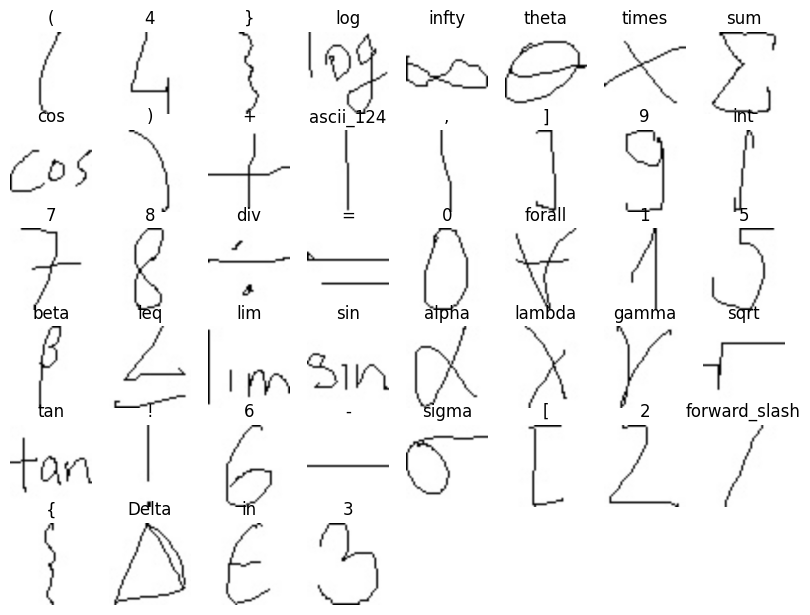

In [14]:
figure = plt.figure(figsize=(10, 10))
j = 0
for i in list(set(y)):
    idx = y.index(i)
    img = x[idx]
    img = cv2.resize(img, (256, 256))
    figure.add_subplot(8, 8, j+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    j += 1

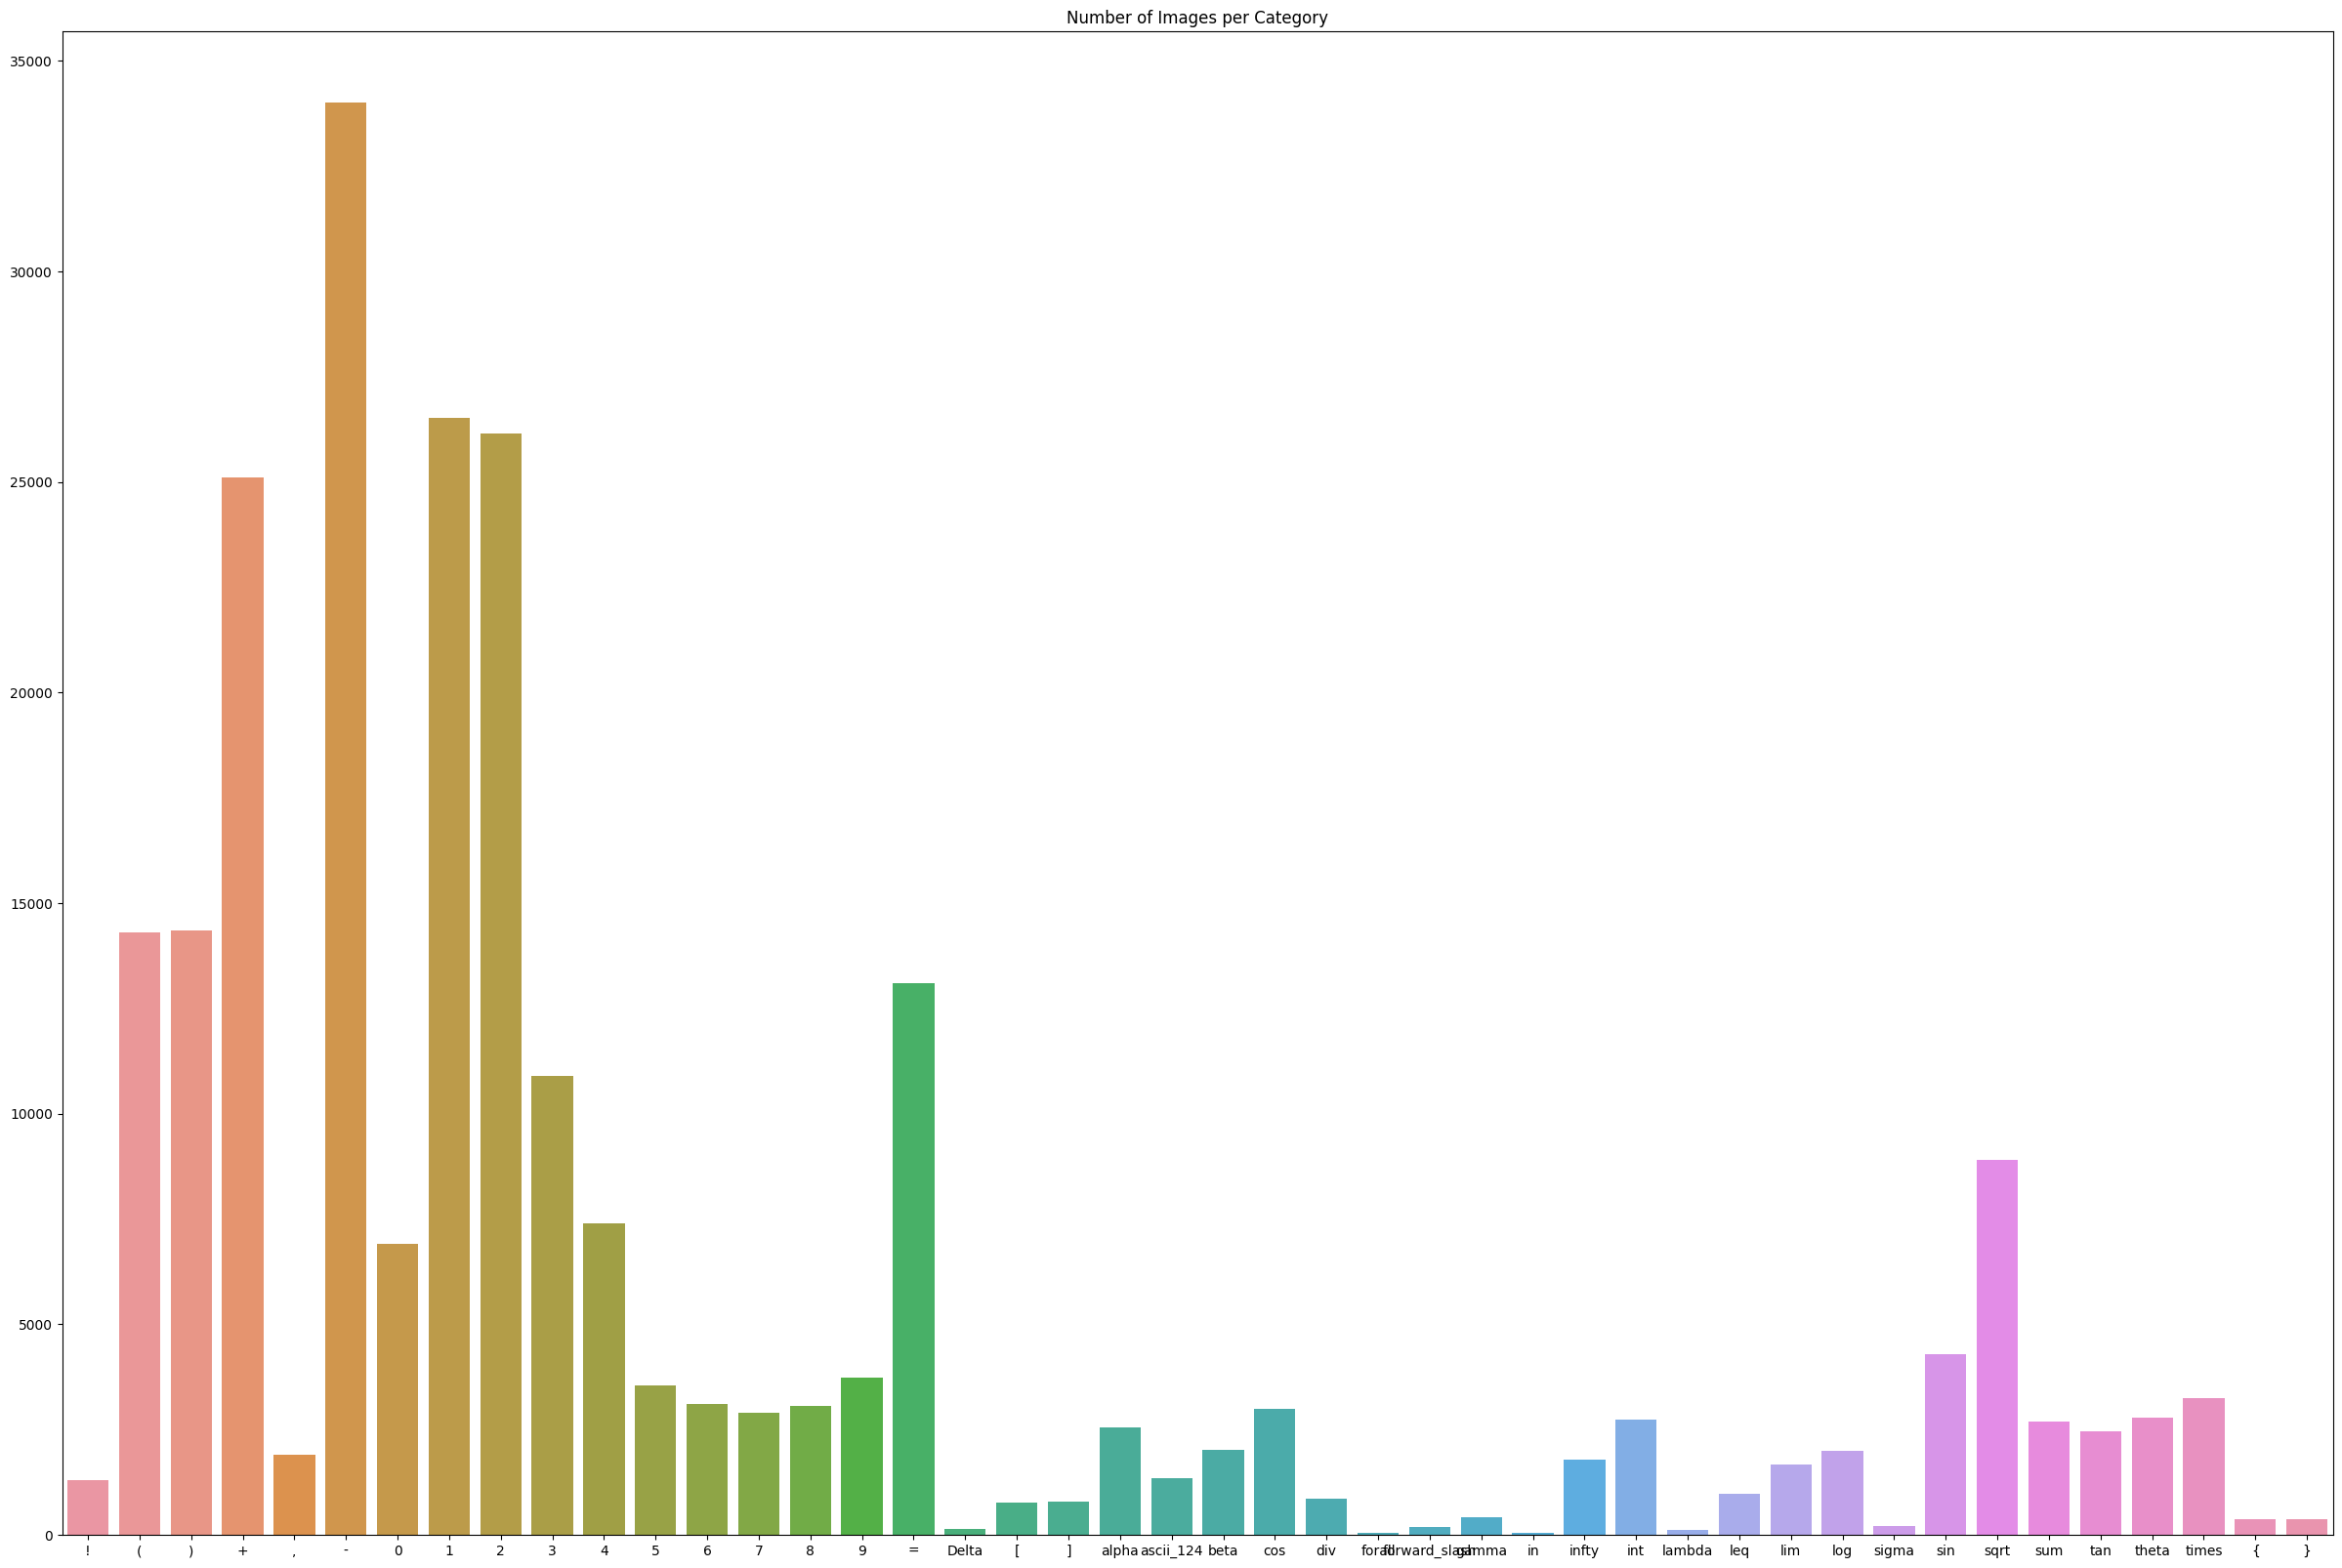

In [20]:
unique, count = np.unique(y, return_counts=True)
figure = plt.figure(figsize=(30, 20))
ax = sn.barplot(x=unique, y=count)
ax.set_title('Number of Images per Category')
plt.show()


In [21]:
X = []
for i in range(len(x)):
#     print(i)
    img = x[i]
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    threshold_image = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)[1]
    threshold_image = cv2.resize(threshold_image, (32, 32))
    X.append(threshold_image)
print(len(X))

245108


In [22]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(len(y))

245108


spliting the data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

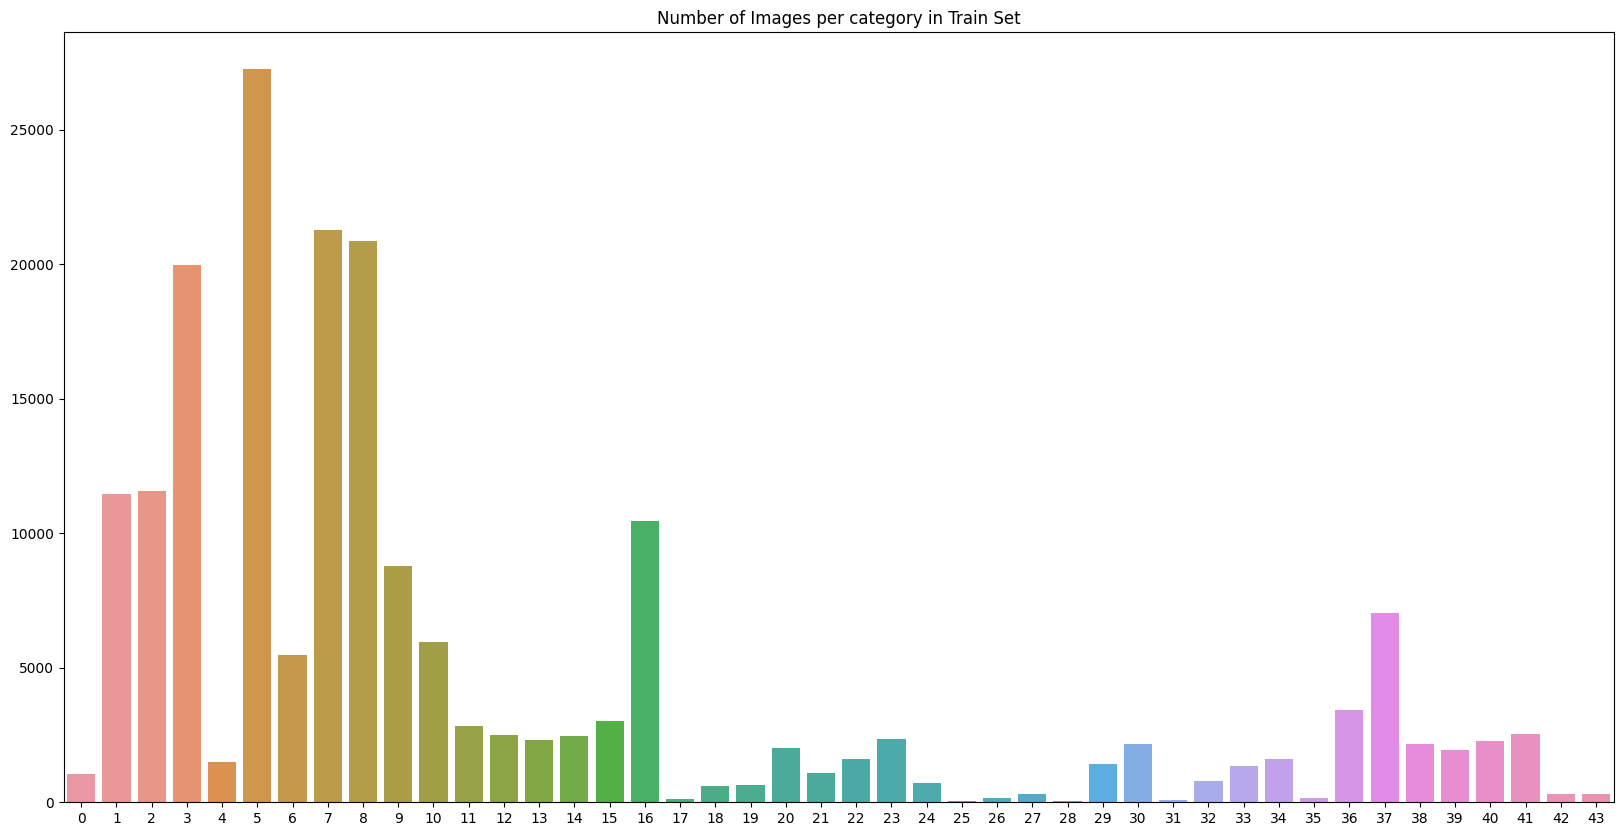

In [25]:
unique_train, count_train = np.unique(Y_train, return_counts=True)
figure = plt.figure(figsize=(20, 10))
ax = sn.barplot(x=unique_train, y=count_train)
ax.set_title('Number of Images per category in Train Set')
plt.show()


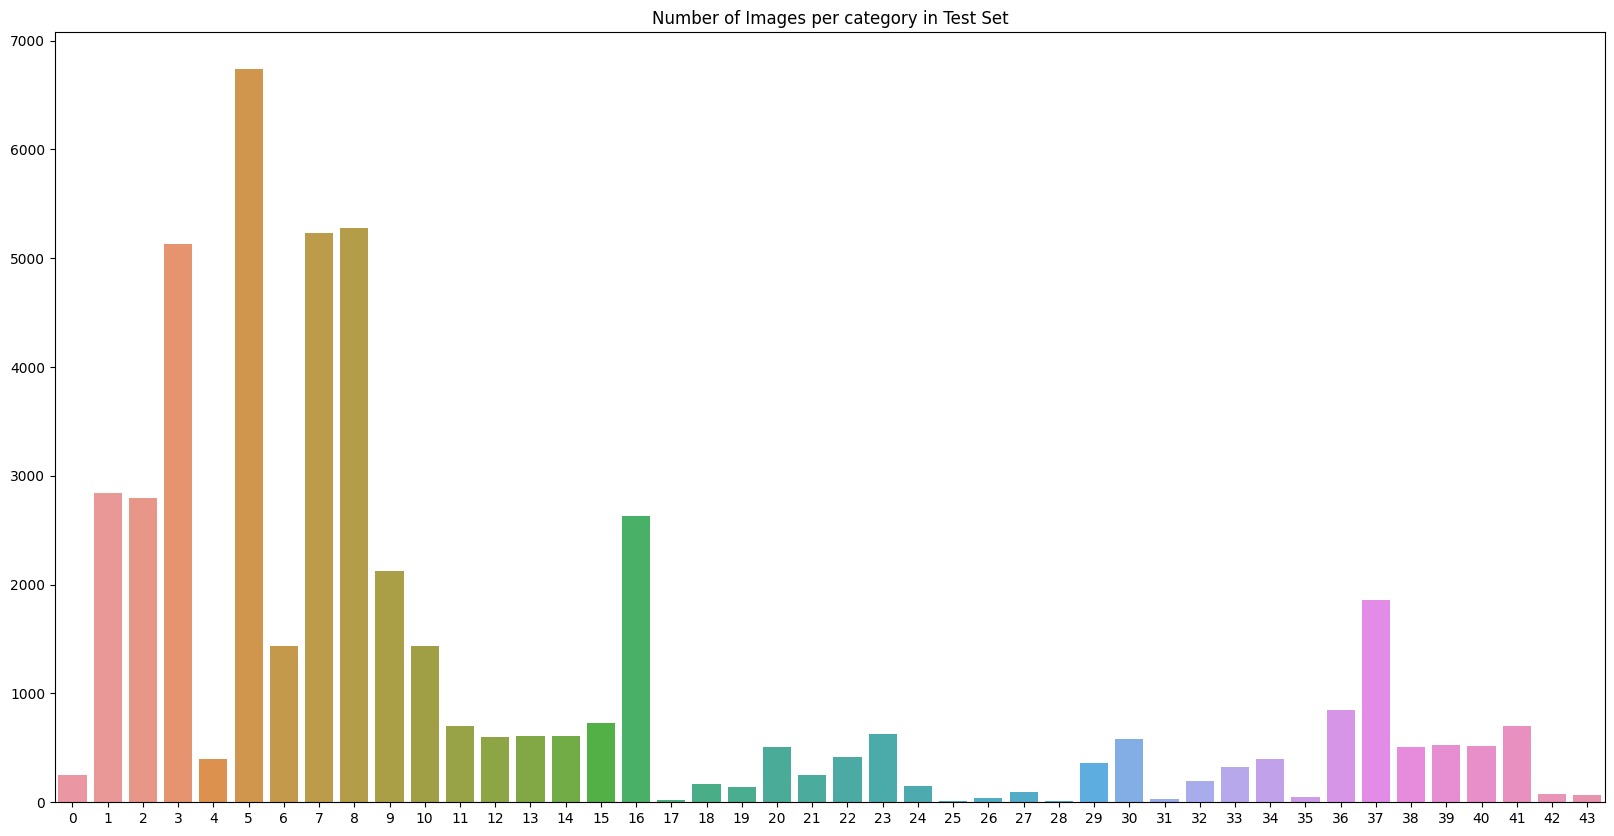

In [28]:
unique_test, count_test = np.unique(Y_test, return_counts=True)
figure = plt.figure(figsize=(20, 10))
ax = sn.barplot(x=unique_test, y=count_test)
ax.set_title('Number of Images per category in Test Set')
plt.show()


In [29]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_train = X_train/255.
X_test = X_test/255.

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(196086, 32, 32, 1)
(49022, 32, 32, 1)
(196086, 44)
(49022, 44)


the CNN Model

In [34]:
def math_symbol_and_digits_recognition(input_shape=(32, 32, 1)):
    regularizer = l2(0.01)
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv1', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act1'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv2', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act2'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv3', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act3'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(120, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc1'))
    model.add(Dense(84, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc2'))
    model.add(Dense(44, activation='softmax', kernel_initializer=glorot_uniform(seed=0), name='fc3'))
    
    optimizer = Adam()
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [35]:
model = math_symbol_and_digits_recognition(input_shape=(32, 32, 1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 32)        320       
                                                                 
 act1 (Activation)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 32)        9248      
                                                                 
 act2 (Activation)           (None, 16, 16, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                 

In [36]:
def step_decay(epoch):
    initial_learning_rate = 0.001
    dropEvery = 10
    factor = 0.5
    lr = initial_learning_rate*(factor**np.floor((1 + epoch)/dropEvery))
    return float(lr)

checkpoint = ModelCheckpoint('maths_symbol_and_digits_recognition.h5', 
                             monitor='val_loss', save_best_only=True, 
                             verbose=1, mode='min')

callbacks = [checkpoint, LearningRateScheduler(step_decay)]

Fitting the Model

In [37]:
aug = ImageDataGenerator(zoom_range=0.1,
#                          rotation_range=5,
                         width_shift_range=0.05,
                         height_shift_range=0.05)
hist = model.fit(aug.flow(X_train, Y_train, batch_size=128), batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
1532/1532 [==============================] - 110s 71ms/step - loss: 0.7317 - accuracy: 0.8307 - val_loss: 0.2966 - val_accuracy: 0.9434
Epoch 2/10
1532/1532 [==============================] - 108s 70ms/step - loss: 0.3075 - accuracy: 0.9257 - val_loss: 0.2215 - val_accuracy: 0.9548
Epoch 3/10
1532/1532 [==============================] - 106s 69ms/step - loss: 0.2489 - accuracy: 0.9388 - val_loss: 0.1888 - val_accuracy: 0.9599
Epoch 4/10
1532/1532 [==============================] - 106s 69ms/step - loss: 0.2201 - accuracy: 0.9451 - val_loss: 0.1618 - val_accuracy: 0.9652
Epoch 5/10
1532/1532 [==============================] - 98s 64ms/step - loss: 0.2029 - accuracy: 0.9488 - val_loss: 0.1700 - val_accuracy: 0.9653
Epoch 6/10
1532/1532 [==============================] - 101s 66ms/step - loss: 0.1921 - accuracy: 0.9506 - val_loss: 0.1593 - val_accuracy: 0.9651
Epoch 7/10
1532/1532 [==============================] - 103s 67ms/step - loss: 0.1820 - accuracy: 0.9538 - val_loss: 0.

Evaluate the model on the test data

In [39]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {test_accuracy}")

1532/1532 [==============================] - 6s 4ms/step - loss: 0.1392 - accuracy: 0.9711
Test accuracy: 0.9710538387298584


Accuracy Plot

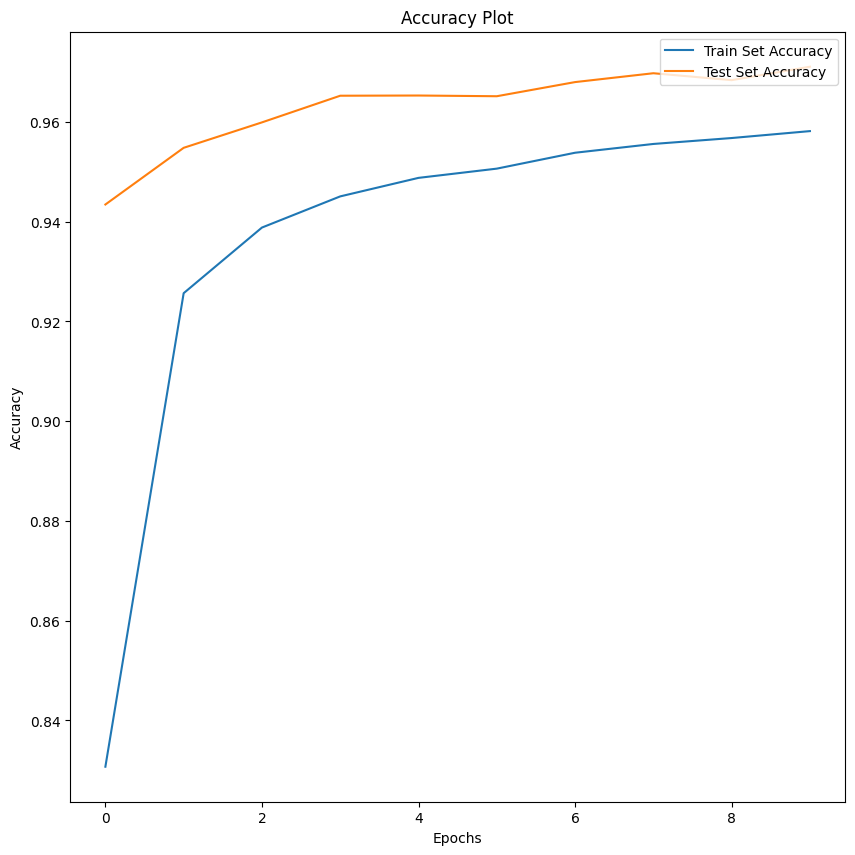

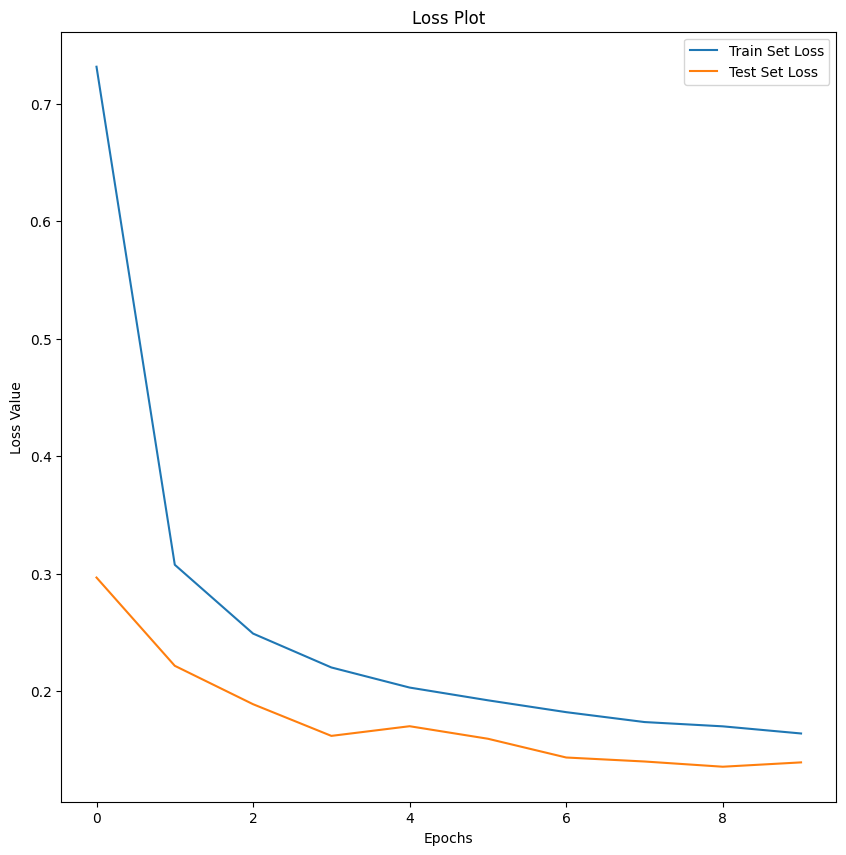

In [40]:
figure = plt.figure(figsize=(10, 10))
plt.plot(hist.history['accuracy'], label='Train Set Accuracy')
plt.plot(hist.history['val_accuracy'], label='Test Set Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(hist.history['loss'], label='Train Set Loss')
plt.plot(hist.history['val_loss'], label='Test Set Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(loc='upper right')
plt.show()

Classifucation Report

In [41]:
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
Y_test_hat = np.argmax(Y_test, axis=1)
print(classification_report(Y_test_hat, ypred))

1532/1532 [==============================] - 6s 4ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       0.95      0.96      0.96      2843
           2       0.93      0.99      0.96      2798
           3       1.00      1.00      1.00      5134
           4       0.74      0.33      0.45       399
           5       0.99      0.99      0.99      6739
           6       0.97      1.00      0.98      1434
           7       0.90      0.95      0.93      5233
           8       0.99      0.99      0.99      5280
           9       1.00      0.98      0.99      2126
          10       0.99      0.98      0.99      1440
          11       0.98      0.98      0.98       703
          12       0.99      0.99      0.99       604
          13       0.98      0.96      0.97       606
          14       0.99      0.99      0.99       605
          15       0.92      1.00      0.96       729
          16       0.99 

c:\Users\Mohamed Elzoka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mohamed Elzoka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mohamed Elzoka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

saving the model

In [ ]:
model.save('model.h5')

Testing the model

In [57]:
import imutils
from imutils.contours import sort_contours
def test_pipeline(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (800, 800))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # blurred = cv2.GaussianBlur(img_gray, (3, 3), 0)
    edged = cv2.Canny(img_gray, 30, 150)
    contours = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    contours = sort_contours(contours, method="left-to-right")[0]
    labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'div', 'mul', 'sub']

    for c in contours:
     x, y, w, h = cv2.boundingRect(c)
    if 20 <= w and 30 <= h:
        # Your code for processing contours goes here
        roi = img_gray[y:y+h, x:x+w]
        thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        (th, tw) = thresh.shape
        if tw > th:
            thresh = imutils.resize(thresh, width=32)
        if th > tw:
            thresh = imutils.resize(thresh, height=32)
        (th, tw) = thresh.shape
        dx = int(max(0, 32 - tw) / 2.0)
        dy = int(max(0, 32 - th) / 2.0)
        padded = cv2.copyMakeBorder(thresh, top=dy, bottom=dy, left=dx, right=dx, borderType=cv2.BORDER_CONSTANT,
                                   value=(0, 0, 0))
        padded = cv2.resize(padded, (32, 32))
        padded = np.array(padded)
        padded = padded / 255.
        padded = np.expand_dims(padded, axis=0)
        padded = np.expand_dims(padded, axis=-1)
        pred = model.predict(padded)
        pred = np.argmax(pred, axis=1)

        if 0 <= pred[0] < len(labels):
            label = labels[pred[0]]
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(img, label, (x-5, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))
    figure = plt.figure(figsize=(10, 10))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

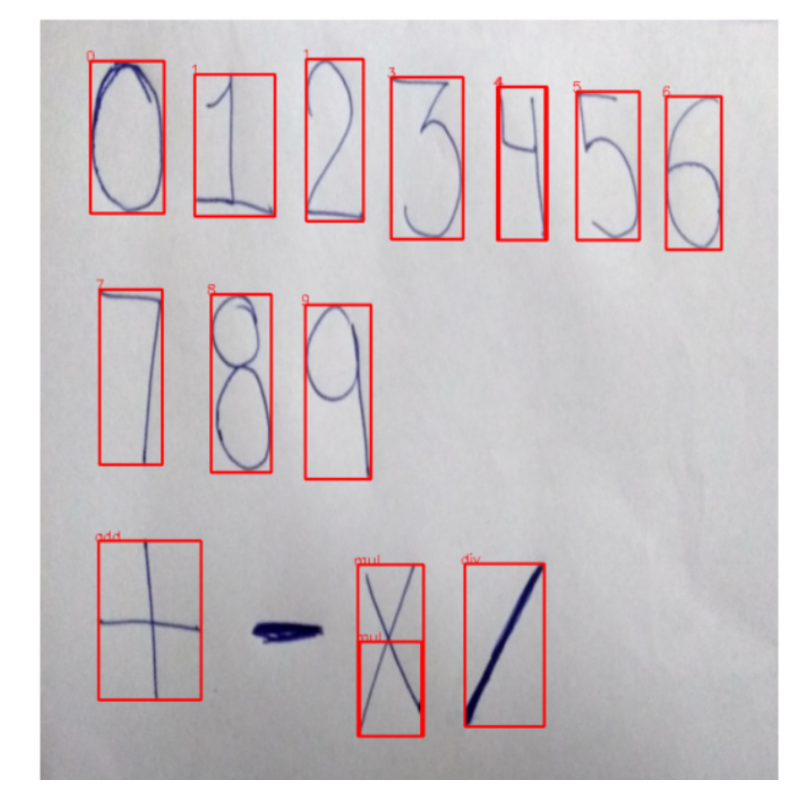

In [59]:
test_pipeline(r'D:\NLP\NLP Diploma Shaai For AI Using Pytourch\nlp-course-notebooks-master\extracted_images\Capturenn.PNG')